# Compliance Radar

#### Team:
- Captain: Filippa Gronberg ()
- Alisa Lamina (321961)
- Evelina Ristovska ()
- Maiia Kopalina ()

### Summary
1) EDA
   1) Load the dataset, understand its structure
   2) Explore each table in the dataset
   3) 

### 1. EDA

In [237]:
#Import libraries and connect to the database
import sqlite3
import pandas as pd

# connect to your database
conn = sqlite3.connect("org_compliance_data.db")

---
>##### Since .db files can contain many datasets, we first check how many datasets there are
---

In [240]:
#list all the datasets in 'org_compliance_data.db'
tables = pd.read_sql_query("SELECT name FROM sqlite_master WHERE type='table';", conn)
print(tables)

                       name
0               departments
1  risk_summary_by_division
2     high_risk_departments
3           data_dictionary


---
>##### Loop through all tables and preview each one
>##### We take a quick look at each table to understand what it contains by displaying first 5 raws from every table.
---

In [243]:
# loop through all tables and show their structure
for table in tables["name"]:
    print(f"\n{'='*50}")
    print(f"Table: {table}")
    print("="*50)
    
    # show first few rows of the table
    df = pd.read_sql_query(f"SELECT * FROM {table} LIMIT 5;", conn)
    print(df.head())


Table: departments
     dept_id                   dept_name           dept_category  \
0  DEPT-1620             Core Compliance     Financial_Reporting   
1  DEPT-1133          Digital Governance     Financial_Reporting   
2  DEPT-4917                 Central Hub  Operational_Compliance   
3  DEPT-6959  Compliance - Legacy Region     Financial_Reporting   
4  DEPT-4312      West Internal Controls     Financial_Reporting   

       division   dept_type  dept_age_years location_type team_size  \
0  Corporate_HQ  Operations             8.0        Remote     Large   
1  Corporate_HQ  Compliance             8.0         Urban     Large   
2          None        None             NaN          None      None   
3  Corporate_HQ     Support             8.0         Urban     Large   
4  Corporate_HQ  Operations             6.0         Urban     Small   

  reporting_structure  manager_experience_level  ...  \
0         Centralized                       2.0  ...   
1         Centralized           

---
>##### This structure is very confusing so we will load each table one by one and explore them separately.
---

#### Table 1: 'departments'

In [247]:
df = pd.read_sql_query("SELECT * FROM departments;", conn)
print("Loaded 'departments' dataset:", df.shape)
print("Columns:", df.columns.tolist())
df.head()

Loaded 'departments' dataset: (709, 37)
Columns: ['dept_id', 'dept_name', 'dept_category', 'division', 'dept_type', 'dept_age_years', 'location_type', 'team_size', 'reporting_structure', 'manager_experience_level', 'supervisor_experience_level', 'primary_function', 'secondary_function', 'creation_reason', 'oversight_body', 'reporting_lag_days', 'training_hours_quarterly', 'violations_past_3years', 'remediation_plan_active', 'executive_support', 'external_consulting', 'engagement_programs', 'onboarding_program', 'improvement_commitment', 'digital_systems', 'external_partnerships', 'interdept_collaboration_score', 'resource_availability_score', 'external_interactions_frequency', 'risk_exposure_operational', 'risk_exposure_financial', 'operational_health_index', 'reporting_gaps_annual', 'audit_score_q1', 'audit_score_q2', 'compliance_score_final', 'overall_risk_score']


,dept_id,dept_name,dept_category,division,dept_type,dept_age_years,location_type,team_size,reporting_structure,manager_experience_level,...,resource_availability_score,external_interactions_frequency,risk_exposure_operational,risk_exposure_financial,operational_health_index,reporting_gaps_annual,audit_score_q1,audit_score_q2,compliance_score_final,overall_risk_score
0,DEPT-1620,Core Compliance,Financial_Reporting,Corporate_HQ,Operations,8.0,Remote,Large,Centralized,2.0,...,2.0,3.0,1.0,NaN,5.0,NaN,55.0,55.0,65.0,12.0
1,DEPT-1133,Digital Governance,Financial_Reporting,Corporate_HQ,Compliance,8.0,Urban,Large,Centralized,2.0,...,4.0,NaN,2.0,2.0,1.0,26.0,NaN,40.0,NaN,43.0
2,DEPT-4917,Central Hub,Operational_Compliance,None,None,NaN,None,None,None,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,DEPT-6959,Compliance - Legacy Region,Financial_Reporting,Corporate_HQ,Support,8.0,Urban,Large,Centralized,4.0,...,3.0,4.0,1.0,1.0,5.0,2.0,70.0,75.0,85.0,11.0
4,DEPT-4312,West Internal Controls,Financial_Reporting,Corporate_HQ,Operations,6.0,Urban,Small,Centralized,1.0,...,4.0,2.0,1.0,1.0,5.0,2.0,45.0,45.0,45.0,11.0


#### Table 2: 'risk_summary_by_division'

In [250]:
df = pd.read_sql_query("SELECT * FROM risk_summary_by_division;", conn)
print("Loaded 'risk_summary_by_division' dataset:", df.shape)
print("Columns:", df.columns.tolist())
df.head()

Loaded 'risk_summary_by_division' dataset: (2, 8)
Columns: ['division', 'avg_compliance_score', 'std_compliance_score', 'min_compliance_score', 'max_compliance_score', 'total_violations', 'avg_risk_score', 'dept_count']


,division,avg_compliance_score,std_compliance_score,min_compliance_score,max_compliance_score,total_violations,avg_risk_score,dept_count
0,Corporate_HQ,63.245477,13.369017,0.0,95.0,122.0,24.463636,428
1,Regional_Operations,76.054167,13.777896,50.8,100.0,55.0,64.000000,27


#### Table 3: 'high_risk_departments'

In [253]:
df = pd.read_sql_query("SELECT * FROM high_risk_departments;", conn)
print("Loaded 'high_risk_departments' dataset:", df.shape)
print("Columns:", df.columns.tolist())
df.head()

Loaded 'high_risk_departments' dataset: (201, 37)
Columns: ['dept_id', 'dept_name', 'dept_category', 'division', 'dept_type', 'dept_age_years', 'location_type', 'team_size', 'reporting_structure', 'manager_experience_level', 'supervisor_experience_level', 'primary_function', 'secondary_function', 'creation_reason', 'oversight_body', 'reporting_lag_days', 'training_hours_quarterly', 'violations_past_3years', 'remediation_plan_active', 'executive_support', 'external_consulting', 'engagement_programs', 'onboarding_program', 'improvement_commitment', 'digital_systems', 'external_partnerships', 'interdept_collaboration_score', 'resource_availability_score', 'external_interactions_frequency', 'risk_exposure_operational', 'risk_exposure_financial', 'operational_health_index', 'reporting_gaps_annual', 'audit_score_q1', 'audit_score_q2', 'compliance_score_final', 'overall_risk_score']


,dept_id,dept_name,dept_category,division,dept_type,dept_age_years,location_type,team_size,reporting_structure,manager_experience_level,...,resource_availability_score,external_interactions_frequency,risk_exposure_operational,risk_exposure_financial,operational_health_index,reporting_gaps_annual,audit_score_q1,audit_score_q2,compliance_score_final,overall_risk_score
0,DEPT-1133,Digital Governance,Financial_Reporting,Corporate_HQ,Compliance,8.0,Urban,Large,Centralized,2.0,...,4.0,NaN,2.0,2.0,1.0,26.0,NaN,40.0,NaN,43.0
1,DEPT-4312,West Internal Controls,Financial_Reporting,Corporate_HQ,Operations,6.0,Urban,Small,Centralized,1.0,...,4.0,2.0,1.0,1.0,5.0,2.0,45.0,45.0,45.0,11.0
2,DEPT-3347,Business Integrity - Central Region,Financial_Reporting,Corporate_HQ,Operations,6.0,Urban,Small,Centralized,2.0,...,4.0,4.0,3.0,5.0,5.0,6.0,45.0,50.0,50.0,53.0
3,DEPT-2554,Central Team,Financial_Reporting,Corporate_HQ,Support,5.0,Urban,Small,Autonomous,3.0,...,3.0,4.0,4.0,4.0,1.0,0.0,65.0,60.0,65.0,40.0
4,DEPT-3151,Compliance - East Region,Financial_Reporting,Corporate_HQ,None,8.0,Urban,Small,Centralized,3.0,...,2.0,4.0,NaN,4.0,4.0,10.0,50.0,50.0,50.0,35.0


#### Table 4: 'data_dictionary'

In [256]:
pd.set_option('display.max_colwidth', None) #to not cut the text since it is a dictionary table
df = pd.read_sql_query("SELECT * FROM data_dictionary;", conn)
print("Loaded 'data_dictionary' dataset:", df.shape)
print("Columns:", df.columns.tolist())
df.head(39)

Loaded 'data_dictionary' dataset: (39, 4)
Columns: ['table_name', 'field_name', 'data_type', 'description']


,table_name,field_name,data_type,description
0,departments,dept_id,string,Unique department identifier
1,departments,dept_name,string,Department name
2,departments,dept_category,string,"Primary compliance category (Financial_Reporting, Operational_Compliance, Risk_Management)"
3,departments,division,string,"Organizational division (Corporate_HQ, Regional_Operations)"
4,departments,dept_type,string,"Department type (Operations, Support, Compliance, Finance, Technology, Legal)"
5,departments,dept_age_years,integer,Age of department in years since establishment
6,departments,location_type,string,"Geographic location type (Urban, Remote, Suburban, International)"
7,departments,team_size,string,"Team size category (Small, Medium, Large)"
8,departments,reporting_structure,string,"Reporting hierarchy (Centralized, Autonomous, Hybrid)"
9,departments,manager_experience_level,integer,Manager experience level (0=none to 4=extensive)


---
#### **Conclusions so far**
**1) No need to rename columns, they are already in a convinient format** 

**2) Learned from the tables structure:** 

**1. `departments`**  
This is the core dataset containing detailed information about each department, such as its category, division, team size, managerial structure, and several operational, financial, and compliance-related indicators.  
→ We will perform full exploratory data analysis (EDA) on this table:
- Check for missing values and data types  
- Generate descriptive statistics  
- Identify distributions and outliers  
- Explore relationships between risk and compliance metrics  
- Prepare data for modeling

**2. `risk_summary_by_division`**  
Provides aggregated information by division (Corporate_HQ, Regional_Operations).  
→ We will check data consistency and analyze differences between divisions.

**3. `high_risk_departments`**  
A filtered subset of departments with high overall risk scores.  
→ We will compare these departments to others in the main dataset to find patterns linked to high risk.

**4. `data_dictionary`**  
Describes all variables and their meanings.  
→ We will use this table as a reference throughout the analysis.

---

#### **1. Table `"departments"`**  

#####   **1.1 Dataset shape**

In [334]:
departments = pd.read_sql_query("SELECT * FROM departments", conn)

# Display the shape of the dataset
print("Shape of the dataset:", departments.shape)

Shape of the dataset: (709, 37)


In [336]:
# Display data types
print("\nData types:")
print(departments.dtypes)


Data types:
dept_id                             object
dept_name                           object
dept_category                       object
division                            object
dept_type                           object
dept_age_years                     float64
location_type                       object
team_size                           object
reporting_structure                 object
manager_experience_level           float64
supervisor_experience_level        float64
primary_function                    object
secondary_function                  object
creation_reason                     object
oversight_body                      object
reporting_lag_days                 float64
training_hours_quarterly           float64
violations_past_3years             float64
remediation_plan_active            float64
executive_support                  float64
external_consulting                float64
engagement_programs                float64
onboarding_program                 float6

In [338]:
# 1. Categorical columns 
categorical_cols = departments.select_dtypes(include=['object']).columns.tolist()

# 2. Numerical columns 
numerical_cols = departments.select_dtypes(include=['int64', 'float64']).columns.tolist()

# 3. Check for any other data types 
other_types = departments.columns.difference(categorical_cols + numerical_cols).tolist()


print("Number of categorical columns:", len(categorical_cols))
print("\nNumber of numerical columns:", len(numerical_cols))
print("\nOther column types (if any):", other_types)

Number of categorical columns: 12

Number of numerical columns: 25

Other column types (if any): []


---
>**Categorical Columns (12 total)**
> - These columns will later require encoding and cleaning

>**Numeric Columns (22 total)**
> - These columns will later require cleaning
---

#####   **1.2 Missing Values**

In [395]:
# Missing Values

missing = departments.isnull().sum().sort_values(ascending=False)

# Count missing values per column
print("Missing values per column:")
print(departments.isnull().sum())

Missing values per column:
dept_id                              0
dept_name                            0
dept_category                        0
division                           254
dept_type                          296
dept_age_years                     298
location_type                      299
team_size                          300
reporting_structure                296
manager_experience_level           296
supervisor_experience_level        300
primary_function                   293
secondary_function                 294
creation_reason                    297
oversight_body                     303
reporting_lag_days                 297
training_hours_quarterly           300
violations_past_3years             303
remediation_plan_active            298
executive_support                  296
external_consulting                295
engagement_programs                299
onboarding_program                 302
improvement_commitment             292
digital_systems                    30

In [370]:
# Percentage of missing values per column
missing_percent = departments.isnull().mean() * 100
print("\nPercentage of missing values per column:")
print(missing_percent.sort_values(ascending=False))


Percentage of missing values per column:
digital_systems                    42.877292
external_interactions_frequency    42.736248
interdept_collaboration_score      42.736248
oversight_body                     42.736248
violations_past_3years             42.736248
onboarding_program                 42.595205
overall_risk_score                 42.313117
training_hours_quarterly           42.313117
team_size                          42.313117
external_partnerships              42.313117
supervisor_experience_level        42.313117
risk_exposure_financial            42.172073
resource_availability_score        42.172073
location_type                      42.172073
engagement_programs                42.172073
operational_health_index           42.031030
remediation_plan_active            42.031030
dept_age_years                     42.031030
creation_reason                    41.889986
reporting_gaps_annual              41.889986
reporting_lag_days                 41.889986
manager_exper

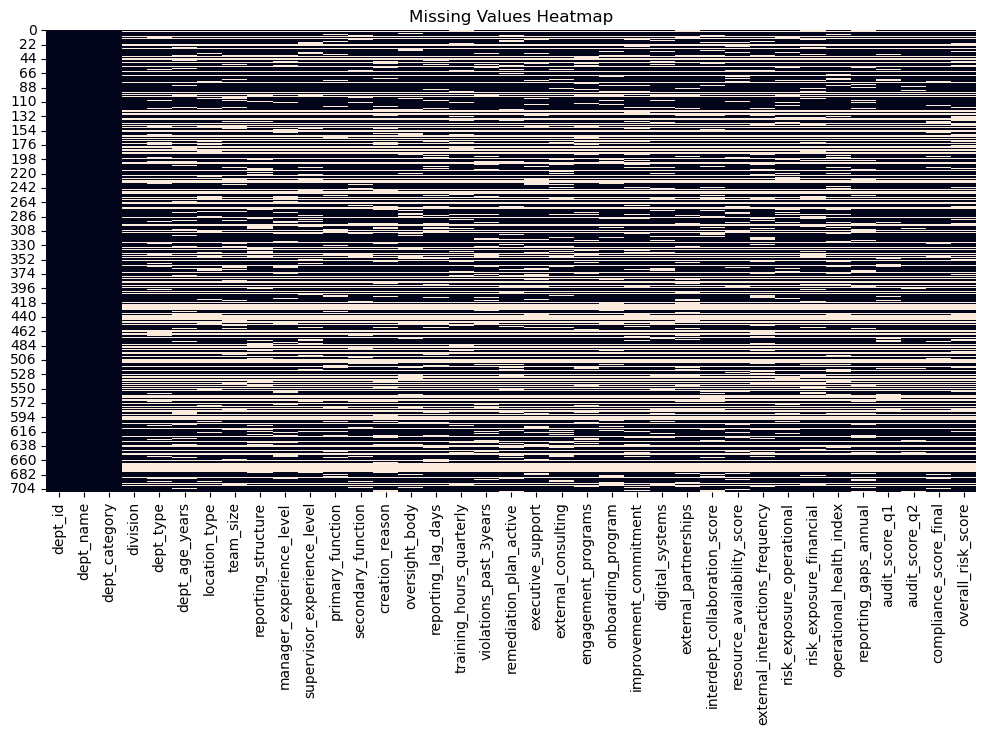

In [402]:
# Visualize missing values using a heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.heatmap(departments.isnull(), cbar=False)
plt.title("Missing Values Heatmap")
plt.show()

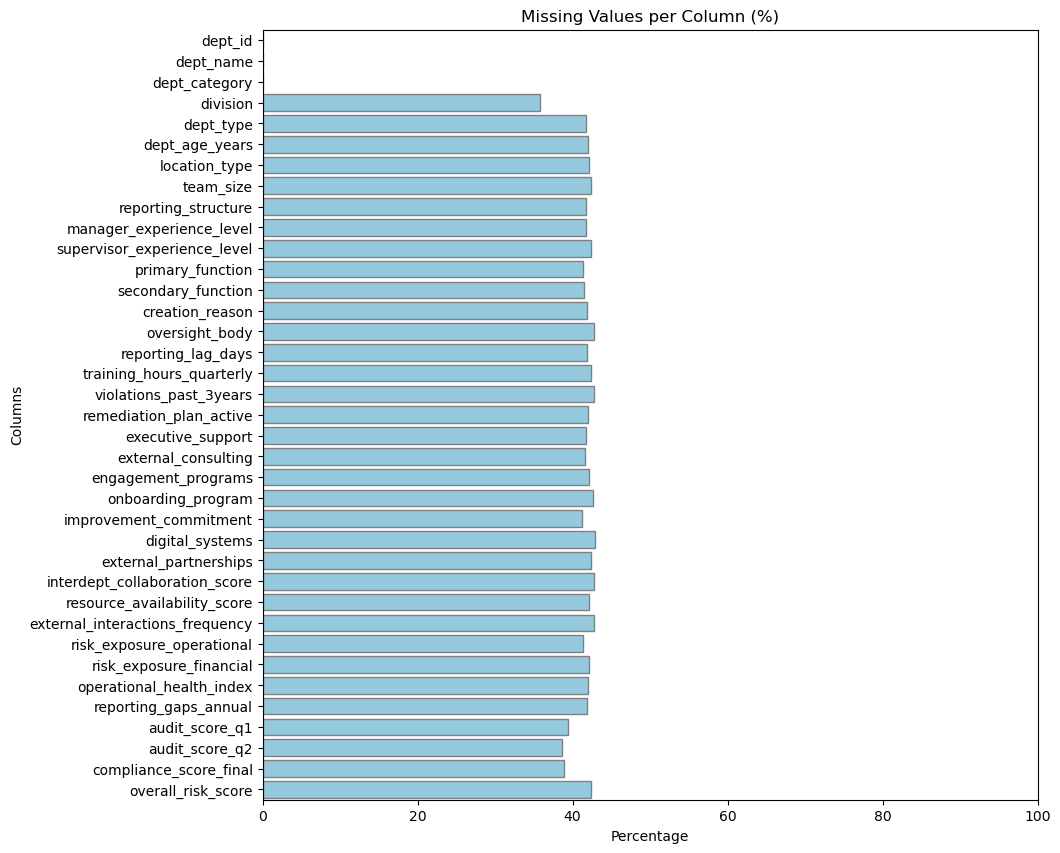

In [384]:
# Visualize percentage of missing values
plt.figure(figsize=(10, 10))
sns.barplot(x=missing_percent.values, y=missing_percent.index, color='skyblue', edgecolor='grey')
plt.xlim(0, 100)
plt.title("Missing Values per Column (%)")
plt.xlabel("Percentage")
plt.ylabel("Columns")
plt.show()

---

>**In most columns 36-42% of data is missing:**
>
> → We miss a lot of data, hich makes the columns unreliable for analysis or modeling unless handled.
>
>**Only dept_id, dept_name, and dept_category are complete (0% missing)**
>
> → These are identifiers and categorical descriptors — stable and useful for grouping and joining.

---

#####   **1.3 Douplicates**

In [405]:
# Count duplicates
duplicates = departments.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")


Number of duplicate rows: 0


> No two rows have exactly the same values across all columns.
> 
> → So we don't need to clean or drop duplicates.

#####   **1.4 Summary statistics for numerical columns**

In [332]:
# Summary statistics for numerical columns
numeric_summary = departments.describe()
display(numeric_summary)

,dept_age_years,manager_experience_level,supervisor_experience_level,reporting_lag_days,training_hours_quarterly,violations_past_3years,remediation_plan_active,executive_support,external_consulting,engagement_programs,...,resource_availability_score,external_interactions_frequency,risk_exposure_operational,risk_exposure_financial,operational_health_index,reporting_gaps_annual,audit_score_q1,audit_score_q2,compliance_score_final,overall_risk_score
count,411.000000,413.000000,409.000000,412.000000,409.000000,406.000000,411.000000,413.000000,414.000000,410.000000,...,410.000000,406.000000,416.000000,410.000000,411.000000,412.000000,430.000000,435.000000,433.000000,409.000000
mean,6.802920,2.624697,2.398533,1.682039,43.180929,0.435961,0.175182,0.607748,0.123188,0.519512,...,3.190244,3.086207,1.673077,2.360976,3.491484,5.114078,61.707209,62.113333,63.955427,26.783619
std,1.915939,1.164637,1.137635,1.019693,19.728215,1.108703,0.380586,0.488845,0.329051,0.500230,...,1.061854,1.190479,1.112404,1.361877,1.447218,6.514748,12.927911,13.338300,13.693694,19.144580
min,2.000000,0.000000,0.000000,1.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,30.000000,0.000000,10.000000
25%,6.000000,2.000000,2.000000,1.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,54.125000,54.900000,55.000000,12.000000
50%,7.000000,3.000000,2.000000,1.000000,40.000000,0.000000,0.000000,1.000000,0.000000,1.000000,...,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,60.000000,60.000000,65.000000,20.000000
75%,8.000000,4.000000,3.000000,2.000000,60.000000,0.000000,0.000000,1.000000,0.000000,1.000000,...,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,70.000000,70.000000,75.000000,34.000000
max,15.000000,4.000000,4.000000,5.000000,100.000000,5.000000,1.000000,1.000000,1.000000,1.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,96.700000,100.000000,100.000000,107.000000


>Binary variables are already encoded as 0/1 and can be kept as they are.
>Likert-scale variables (1–5) represent ordered categories and can be treated as numeric for correlation and visualization.

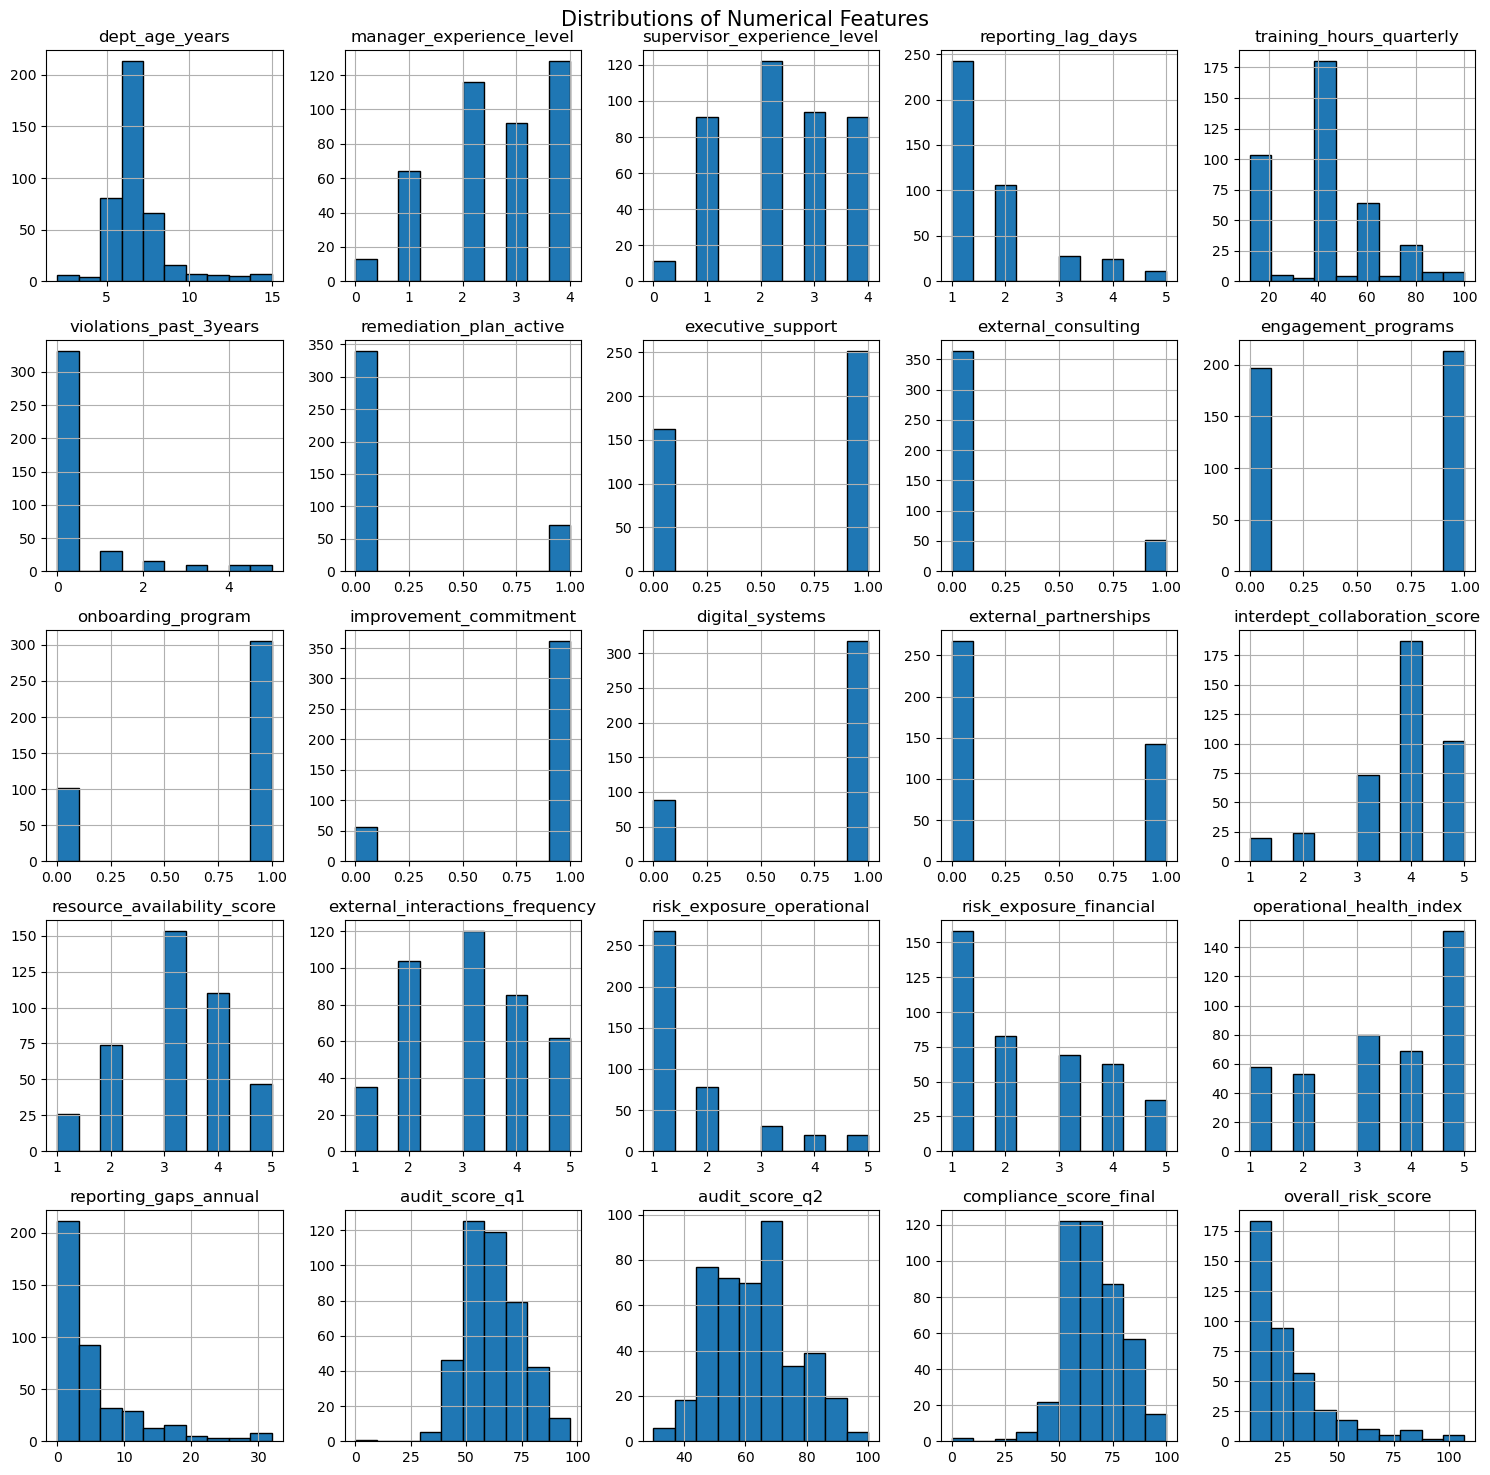

In [449]:
# Select only numerical columns
num_cols = departments.select_dtypes(include=['float64', 'int64']).columns

# Plot histograms
departments[num_cols].hist(figsize=(15, 15), edgecolor='black')
plt.suptitle("Distributions of Numerical Features", fontsize=15)
plt.tight_layout()
plt.show()

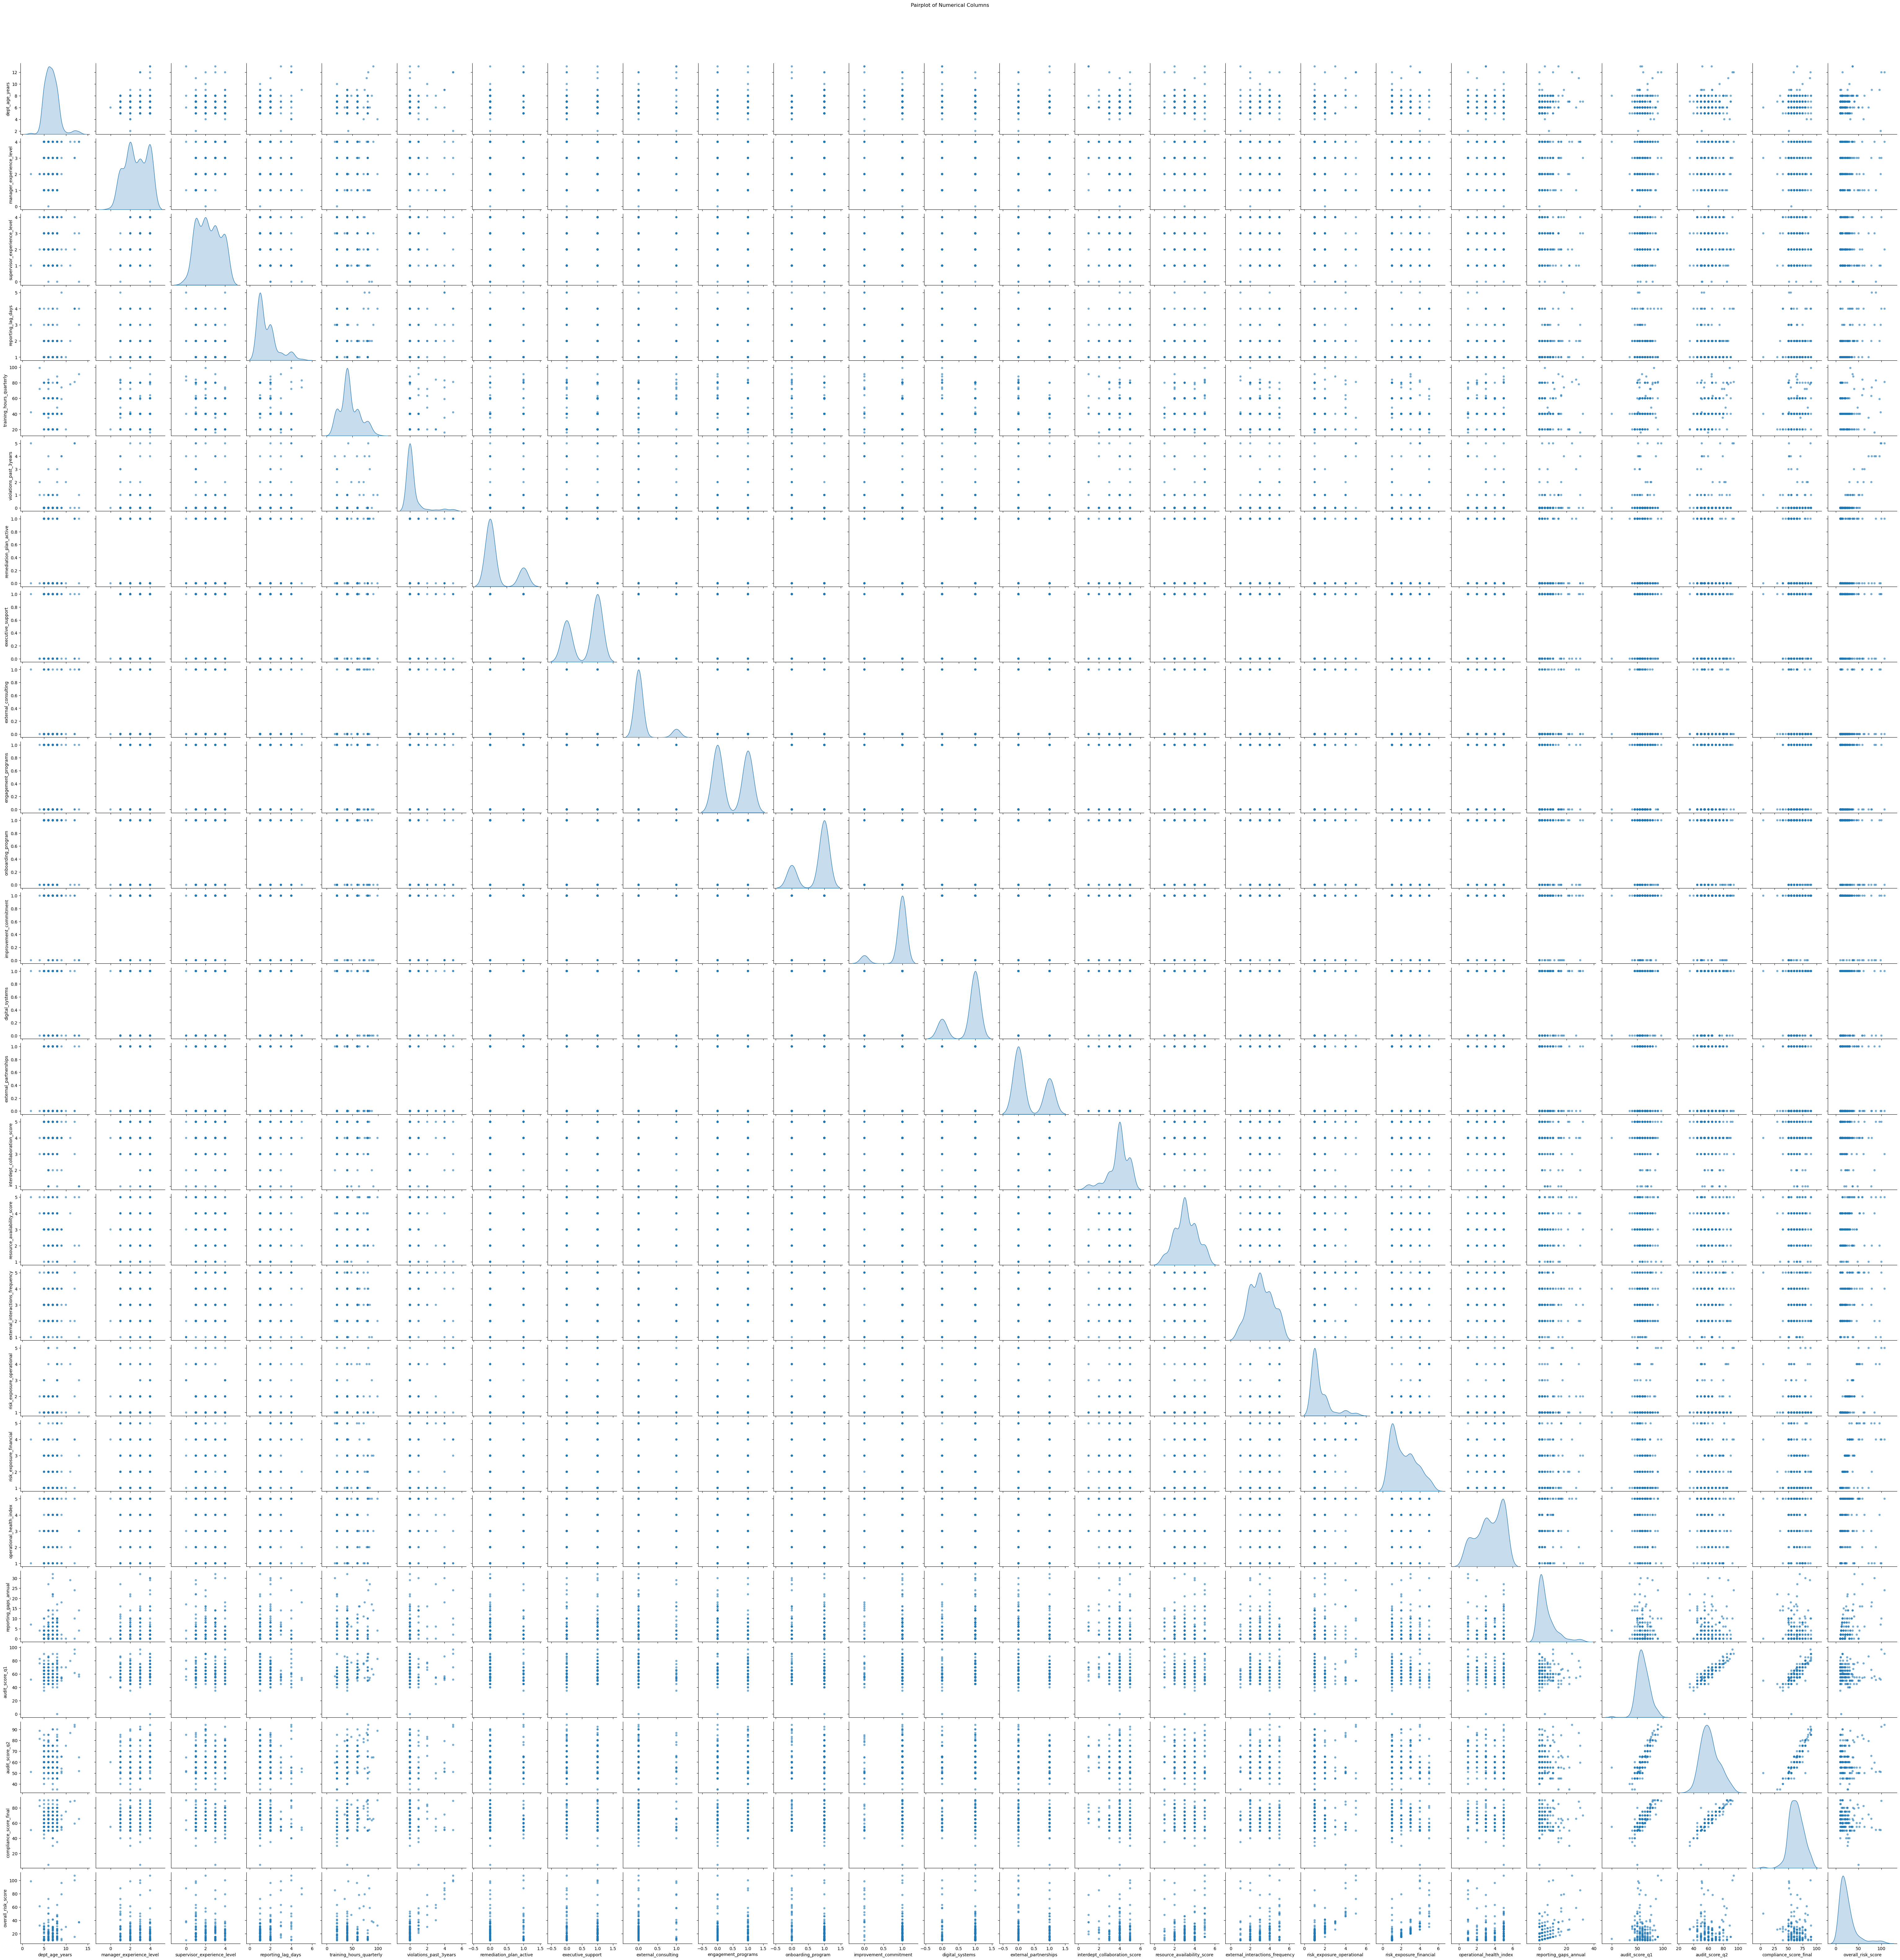

In [448]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numerical columns
num_cols = departments.select_dtypes(include=['float64', 'int64']).columns

# Sample if the dataset is large (optional)
sample = departments[num_cols].sample(300, random_state=42) if len(departments) > 300 else departments[num_cols]

# Pairplot
sns.pairplot(sample, diag_kind='kde', plot_kws={'alpha': 0.6, 's': 25, 'edgecolor': 'none'})
plt.suptitle("Pairplot of Numerical Columns", y=1.02)
plt.show()

In [151]:
# Show all unique divisions and how many departments each has
df = pd.read_sql_query("SELECT * FROM departments;", conn)

print("List of divisions and department counts:")
print(df['division'].value_counts(dropna=False))

List of divisions and department counts:
division
Corporate_HQ           428
None                   254
Regional_Operations     27
Name: count, dtype: int64
